In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the dataset

In [94]:
dataset = pd.read_csv('boston.csv')

In [95]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [96]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [97]:
dataset.rename(columns={'MEDV':'Price'},inplace=True)

In [98]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [99]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## summarizing the stats of the data


In [100]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## EDA

## check the missing values


In [101]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

Text(0.5, 1.0, 'Price vs Crime rate')

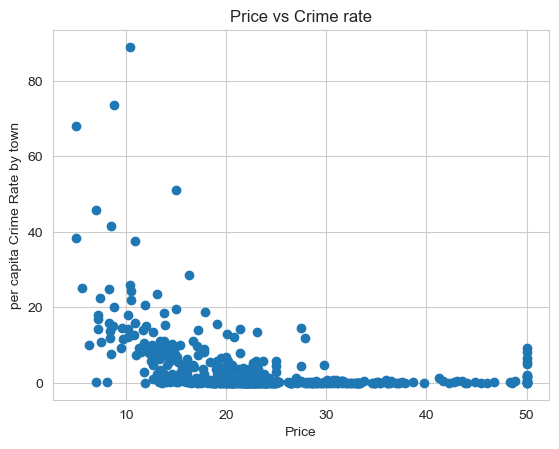

In [102]:
plt.scatter(x=dataset['Price'],y=dataset['CRIM'])
plt.xlabel("Price")
plt.ylabel("per capita Crime Rate by town")
plt.title('Price vs Crime rate')

### Price is low where crime rate is high in the town and Price is high where crime rate is low

Text(0.5, 1.0, 'Price vs nitric oxides concentration')

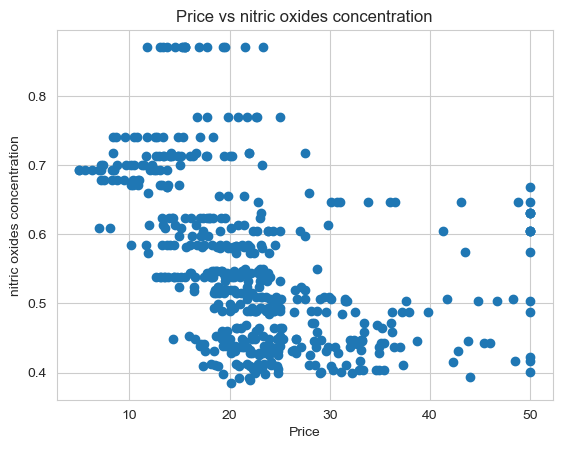

In [103]:
plt.scatter(x=dataset['Price'],y=dataset['NOX'])
plt.xlabel("Price")
plt.ylabel("nitric oxides concentration")
plt.title('Price vs nitric oxides concentration')

Text(0.5, 1.0, 'Price vs average number of rooms per dewllings')

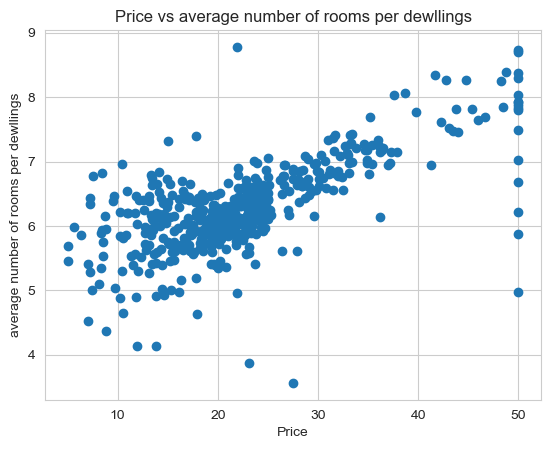

In [104]:
plt.scatter(x=dataset['Price'],y=dataset['RM'])
plt.xlabel("Price")
plt.ylabel("average number of rooms per dewllings")
plt.title('Price vs average number of rooms per dewllings')

#### clear pattern as the number of rooms increases the price increases

Text(0.5, 1.0, 'Price vs age of the house')

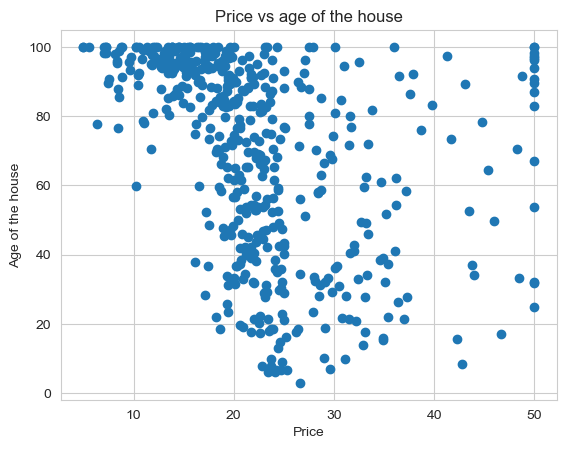

In [105]:
plt.scatter(x=dataset['Price'],y=dataset['AGE'])
plt.xlabel("Price")
plt.ylabel("Age of the house")
plt.title('Price vs age of the house')

#### initial follows a pattern as the age of the house is less the price increases but this pattern is lost 

Text(0.5, 1.0, 'Price vs weighted distances to five Boston employment centres')

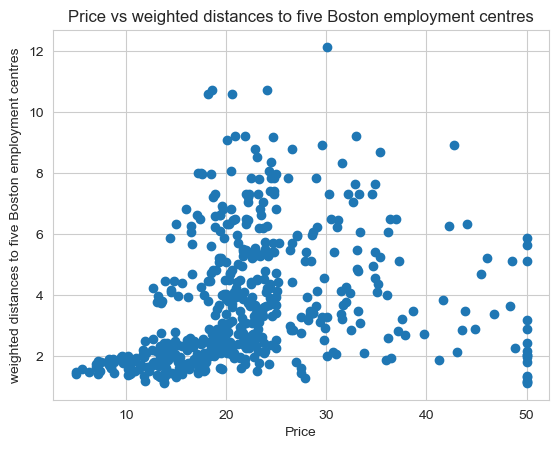

In [106]:
plt.scatter(x=dataset['Price'],y=dataset['DIS'])
plt.xlabel("Price")
plt.ylabel("weighted distances to five Boston employment centres")
plt.title('Price vs weighted distances to five Boston employment centres')

Text(0.5, 1.0, 'Price vs index of accessibility to radial highways')

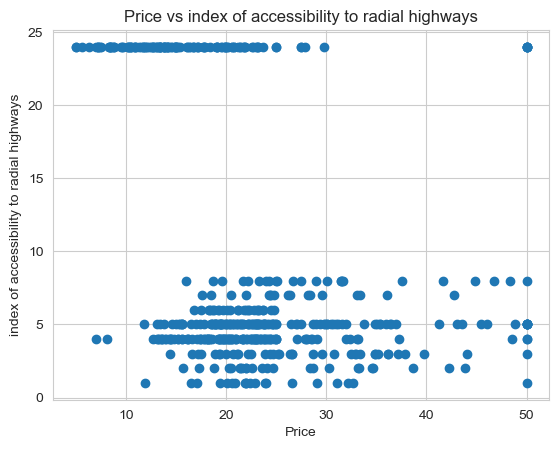

In [107]:
plt.scatter(x=dataset['Price'],y=dataset['RAD'])
plt.xlabel("Price")
plt.ylabel("index of accessibility to radial highways")
plt.title('Price vs index of accessibility to radial highways')

Text(0.5, 1.0, 'Price vs full-value property-tax rate per $10,000')

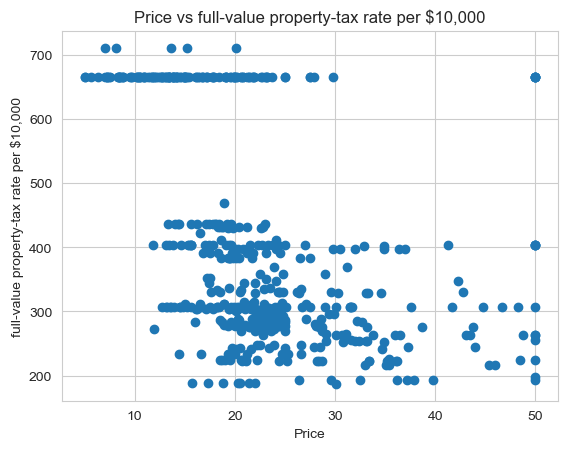

In [108]:
plt.scatter(x=dataset['Price'],y=dataset['TAX'])
plt.xlabel("Price")
plt.ylabel("full-value property-tax rate per $10,000")
plt.title('Price vs full-value property-tax rate per $10,000')

Text(0.5, 1.0, 'Price vs pupil-teacher ratio by town')

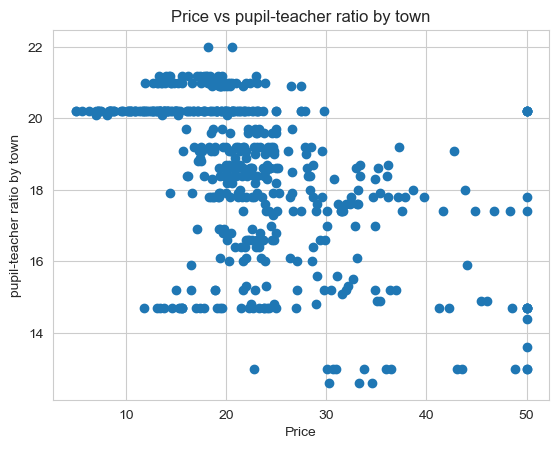

In [109]:
plt.scatter(x=dataset['Price'],y=dataset['PTRATIO'])
plt.xlabel("Price")
plt.ylabel("pupil-teacher ratio by town")
plt.title('Price vs pupil-teacher ratio by town')

#### The spread is mostly even

Text(0.5, 1.0, 'Price vs  proportion of blacks by town')

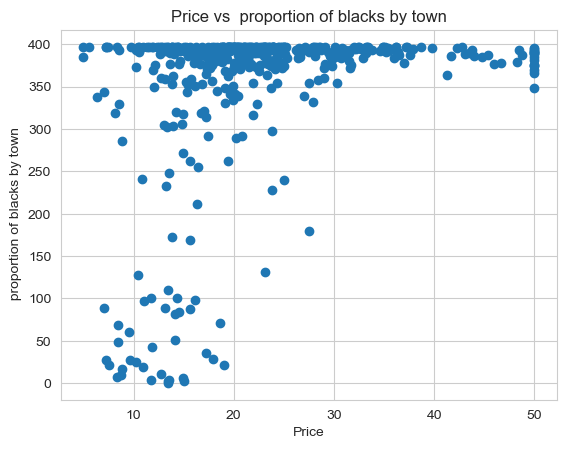

In [110]:
plt.scatter(x=dataset['Price'],y=dataset['B'])
plt.xlabel("Price")
plt.ylabel(" proportion of blacks by town")
plt.title('Price vs  proportion of blacks by town')

Text(0.5, 1.0, 'Price vs % of lower status of people')

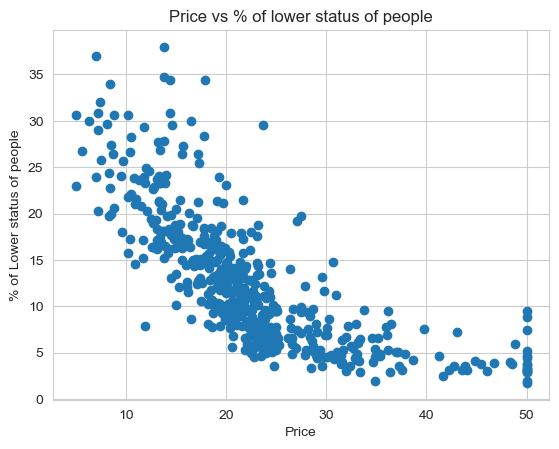

In [111]:
plt.scatter(x=dataset['Price'],y=dataset['LSTAT'])
plt.xlabel("Price")
plt.ylabel("% of Lower status of people")
plt.title('Price vs % of lower status of people')

#### price is low where there is a high number of lower status of prople

In [112]:
# Droping the columns
drop_cols=['NOX','RAD','TAX','PTRATIO','B']
dataset.drop(drop_cols,axis=1,inplace=True)
dataset.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,LSTAT,Price
0,0.00632,18.0,2.31,0,6.575,65.2,4.0900,4.98,24.0
1,0.02731,0.0,7.07,0,6.421,78.9,4.9671,9.14,21.6
2,0.02729,0.0,7.07,0,7.185,61.1,4.9671,4.03,34.7
3,0.03237,0.0,2.18,0,6.998,45.8,6.0622,2.94,33.4
4,0.06905,0.0,2.18,0,7.147,54.2,6.0622,5.33,36.2


### checking for outliers

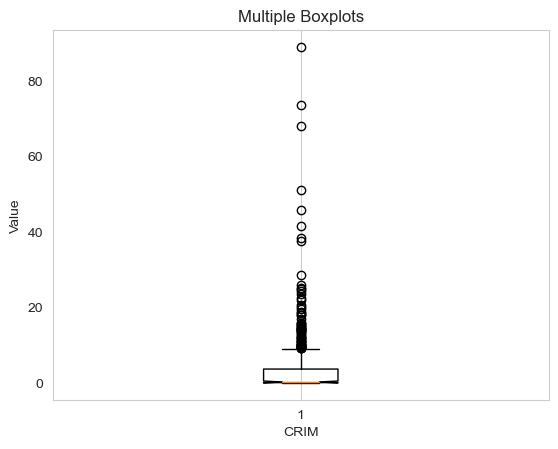

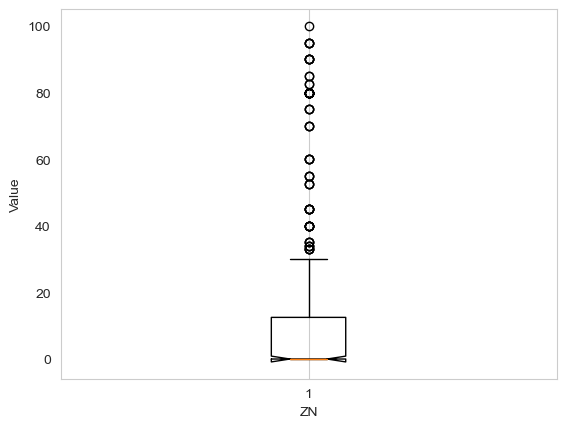

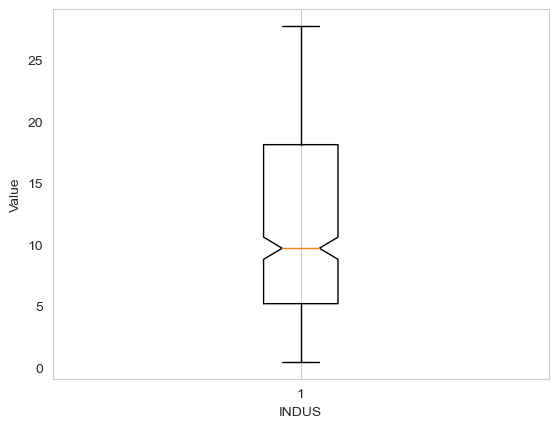

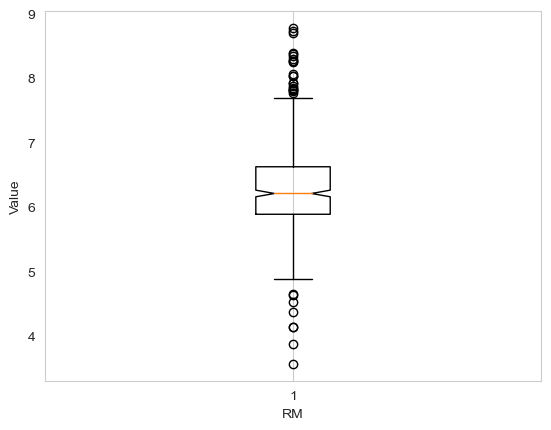

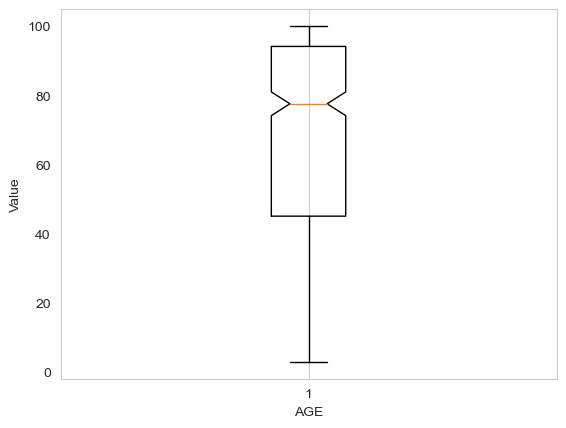

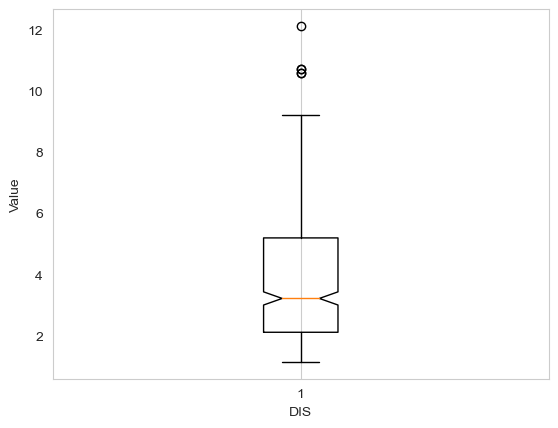

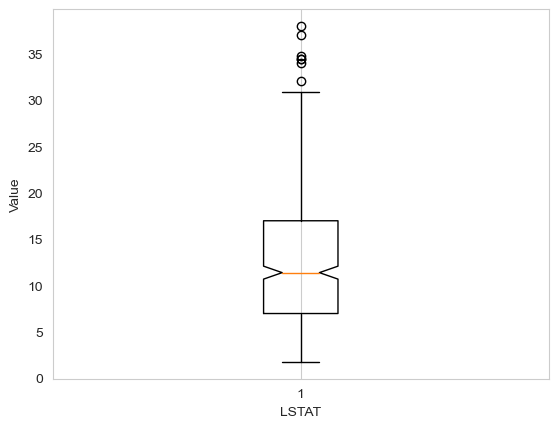

In [113]:
plt.title('Multiple Boxplots')
cols=['CRIM','ZN','INDUS','RM','AGE','DIS','LSTAT']
for col in cols:
    plt.boxplot(dataset[col],col)  
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.grid(axis='y')
    plt.show()


In [114]:
#function to calculate IQR
def cal_IQR_Upper_lower_bound(feature,multiplier):
    IQR= dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
    print("IQR: ",IQR)
    lower_bound=dataset[feature].quantile(0.25)-(IQR*multiplier)
    upper_bound=dataset[feature].quantile(0.75)+(IQR*multiplier)
    print("lower bound: ",lower_bound)
    print("upper bound: ",upper_bound)
    return lower_bound,upper_bound

## Handling missing values

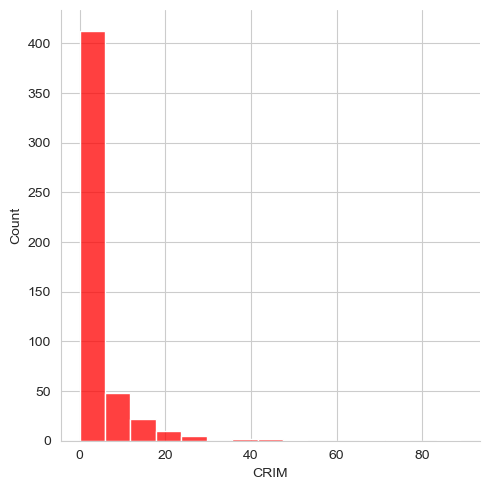

In [115]:
sns.set_style('whitegrid')
sns.displot(dataset['CRIM'], kde = False, color ='red', bins = 15)

In [116]:
#calculating IQR, upper bound and lower bound for crime rate column
lower_bound, upper_bound=cal_IQR_Upper_lower_bound('CRIM',3)

IQR:  3.5950375
lower bound:  -10.7030675
upper bound:  14.462195000000001


In [117]:
dataset.loc[dataset['CRIM']> upper_bound,'CRIM']=upper_bound

In [118]:
dataset['CRIM'].describe()

count    506.000000
mean       2.721417
std        4.466174
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       14.462195
Name: CRIM, dtype: float64

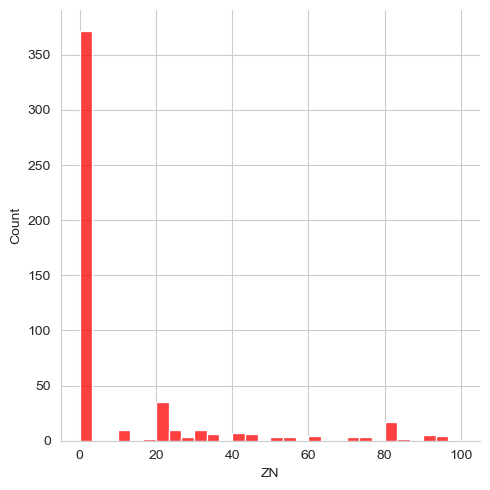

In [119]:
sns.set_style('whitegrid')
sns.displot(dataset['ZN'], kde = False, color ='red', bins = 30)

In [120]:
   lower_bound,upper_bound=cal_IQR_Upper_lower_bound("ZN",1.5) 

IQR:  12.5
lower bound:  -18.75
upper bound:  31.25


In [121]:
dataset.loc[dataset['ZN']> upper_bound,'ZN']=upper_bound

In [122]:
dataset['ZN'].describe()

count    506.000000
mean       6.963439
std       12.028788
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max       31.250000
Name: ZN, dtype: float64

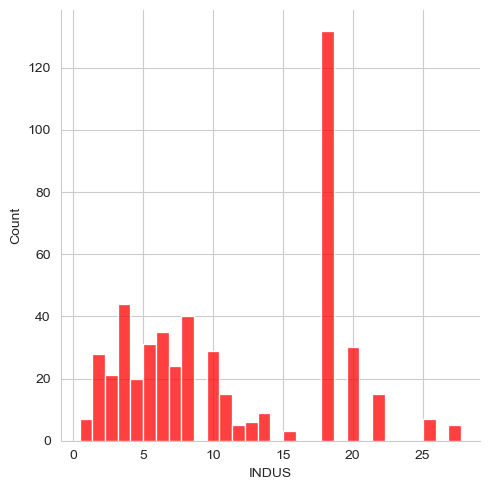

In [123]:
sns.set_style('whitegrid')
sns.displot(dataset['INDUS'], kde = False, color ='red', bins = 30)

In [124]:
lower_bound,upper_bound=cal_IQR_Upper_lower_bound("INDUS",1.5)

IQR:  12.91
lower bound:  -14.175
upper bound:  37.465


In [125]:
dataset.loc[dataset['INDUS']> upper_bound,'INDUS']=upper_bound

In [126]:
dataset['INDUS'].describe()

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64

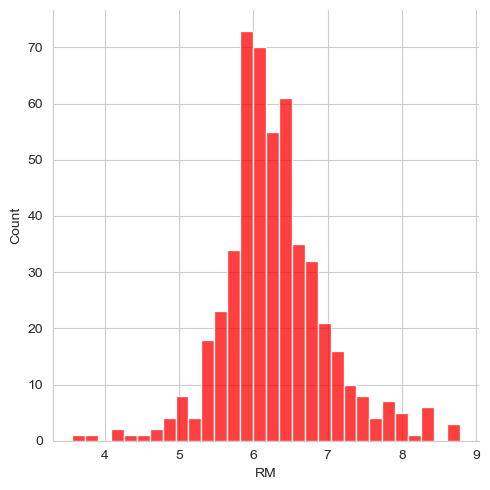

In [127]:
sns.set_style('whitegrid')
sns.displot(dataset['RM'], kde = False, color ='red', bins = 30)

In [128]:
lower_bound,upper_bound=cal_IQR_Upper_lower_bound("RM",1.5)

IQR:  0.7380000000000004
lower bound:  4.778499999999999
upper bound:  7.730500000000001


In [129]:
dataset.loc[dataset['RM']> upper_bound,'RM']=upper_bound

In [130]:
dataset['RM'].describe()

count    506.000000
mean       6.266694
std        0.655550
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        7.730500
Name: RM, dtype: float64

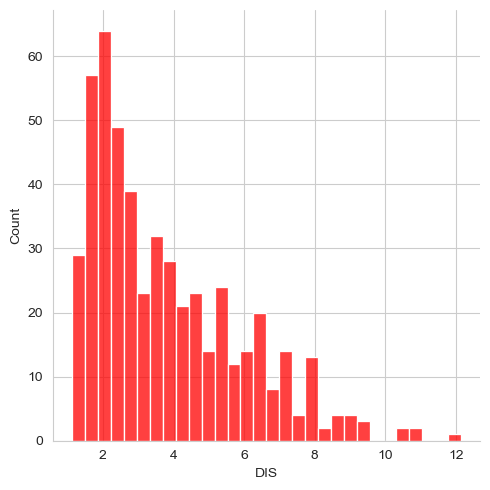

In [131]:
sns.set_style('whitegrid')
sns.displot(dataset['DIS'], kde = False, color ='red', bins = 30)

In [132]:
lower_bound,upper_bound=cal_IQR_Upper_lower_bound("DIS",1.5)

IQR:  3.0882500000000004
lower bound:  -2.5322000000000005
upper bound:  9.820800000000002


In [133]:
dataset.loc[dataset['DIS']> upper_bound,'DIS']=upper_bound

In [134]:
dataset['DIS'].describe()

count    506.000000
mean       3.783947
std        2.069765
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max        9.820800
Name: DIS, dtype: float64

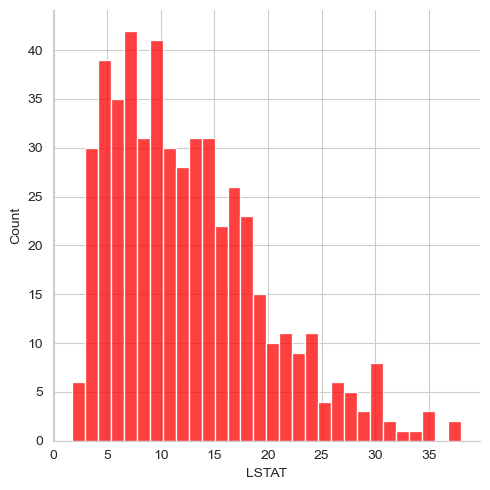

In [136]:
sns.set_style('whitegrid')
sns.displot(dataset['LSTAT'], kde = False, color ='red', bins = 30)

In [137]:
lower_bound,upper_bound=cal_IQR_Upper_lower_bound("LSTAT",1.5)

IQR:  10.005000000000003
lower bound:  -8.057500000000005
upper bound:  31.962500000000006


In [138]:
dataset.loc[dataset['LSTAT']> upper_bound,'LSTAT']=upper_bound

In [139]:
dataset['LSTAT'].describe()

count    506.000000
mean      12.612011
std        7.016829
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       31.962500
Name: LSTAT, dtype: float64

## correlation

In [17]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

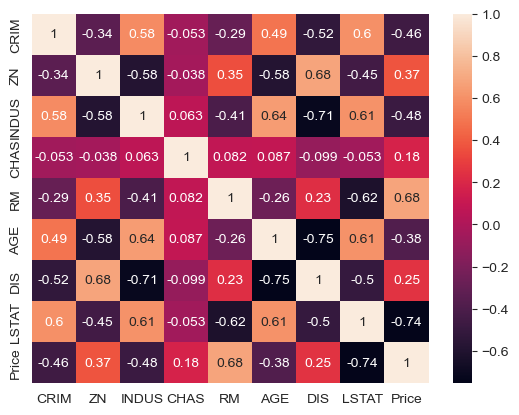

In [142]:
sns.heatmap(dataset.corr(),annot=True)

#### features like ZN, CHAS, DIS, AGE are not highly correalated

In [149]:
drop_col=['ZN','CHAS','DIS','AGE']
dataset.drop(drop_col,axis=1,inplace=True)
dataset.head()

,CRIM,INDUS,RM,LSTAT,Price
0,0.00632,2.31,6.575,4.98,24.0
1,0.02731,7.07,6.421,9.14,21.6
2,0.02729,7.07,7.185,4.03,34.7
3,0.03237,2.18,6.998,2.94,33.4
4,0.06905,2.18,7.147,5.33,36.2


<Axes: xlabel='RM', ylabel='Price'>

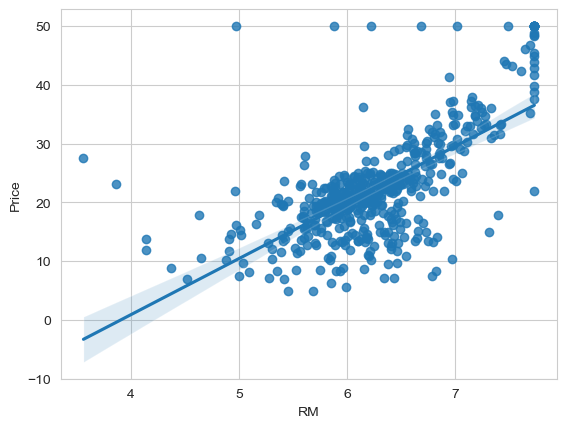

In [150]:
sns.regplot(x= "RM" , y= "Price" , data= dataset)

<Axes: xlabel='LSTAT', ylabel='Price'>

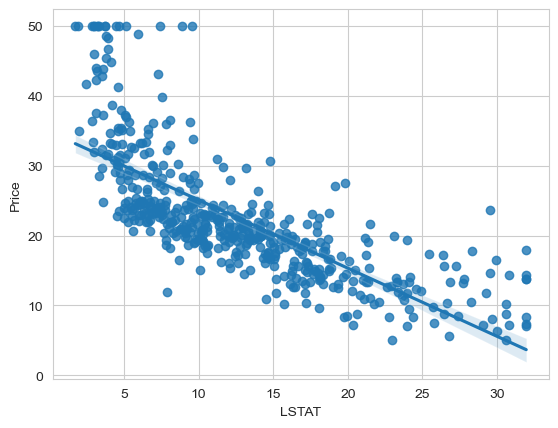

In [151]:
sns.regplot(x= "LSTAT" , y= "Price" , data= dataset)

In [152]:
##Independent and dependent features

X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]

In [153]:
X

,CRIM,INDUS,RM,LSTAT
0,0.00632,2.31,6.575,4.98
1,0.02731,7.07,6.421,9.14
2,0.02729,7.07,7.185,4.03
3,0.03237,2.18,6.998,2.94
4,0.06905,2.18,7.147,5.33
...,...,...,...,...
501,0.06263,11.93,6.593,9.67
502,0.04527,11.93,6.120,9.08
503,0.06076,11.93,6.976,5.64
504,0.10959,11.93,6.794,6.48


In [154]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [155]:
## train test split


from sklearn.model_selection import train_test_split
X_train,X_test , y_train , y_test= train_test_split(X,Y ,test_size=0.3,random_state=42)

In [156]:
X_train

,CRIM,INDUS,RM,LSTAT
5,0.029850,2.18,6.430,5.21
116,0.131580,10.01,6.176,12.04
45,0.171420,6.91,5.682,10.21
16,1.053930,8.14,5.935,6.58
468,14.462195,18.10,5.926,18.13
...,...,...,...,...
106,0.171200,8.56,5.836,18.66
270,0.299160,6.96,5.856,13.00
348,0.015010,2.01,6.635,5.99
435,11.160400,18.10,6.629,23.27


In [157]:
X_test

,CRIM,INDUS,RM,LSTAT
173,0.09178,4.05,6.4160,9.04
274,0.05644,6.41,6.7580,3.53
491,0.10574,27.74,5.9830,18.07
72,0.09164,10.81,6.0650,5.52
452,5.09017,18.10,6.2970,17.27
...,...,...,...,...
441,9.72418,18.10,6.4060,19.52
23,0.98843,8.14,5.8130,19.88
225,0.52693,6.20,7.7305,4.63
433,5.58107,18.10,6.4360,16.22


## Standardize the dataset 


In [160]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [161]:
X_train=scaler.fit_transform(X_train)

In [181]:
X_test=scaler.transform(X_test)

# model training


In [179]:
from sklearn.metrics import mean_squared_error
def get_mean_squared_error(y_test,pred):
   
    print("mean squared error: ",mean_squared_error(y_test, pred))
    ## root mean squared error
    print("Root mean srquared error: ",np.sqrt(mean_squared_error(y_test, pred)))
    

## Linear regression

In [182]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

# prediction on test data
reg_pred = regression.predict(X_test)
get_mean_squared_error(y_test,reg_pred)

mean squared error:  2276.4235994854707
Root mean srquared error:  47.71188111451351


## Decision Tree Regression

In [184]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)
 
y_dt_pred = decision_tree.predict(X_test)
get_mean_squared_error(y_test,y_dt_pred)

mean squared error:  78.32322368421053
Root mean srquared error:  8.850040886019144


## Random Forest Regression

In [185]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train,y_train)

y_rf_pred = random_forest.predict(X_test)
get_mean_squared_error(y_test,y_rf_pred)

mean squared error:  81.35095648684224
Root mean srquared error:  9.019476508470003


## Support Vector Regression (SVR)

In [188]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
 
y_svr_pred = svr.predict(X_test)
get_mean_squared_error(y_test,y_svr_pred)

mean squared error:  1188.4704426767646
Root mean srquared error:  34.47419966695042


## Ridge Regression

In [189]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.1)
rr.fit(X_train, y_train)
 

y_rr_pred = rr.predict(X_test)
get_mean_squared_error(y_test,y_rr_pred)

mean squared error:  2275.1533305652533
Root mean srquared error:  47.698567384830895


## Lasso Regression

In [190]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
 
y_lr_pred = model.predict(X_test)
get_mean_squared_error(y_test,y_lr_pred)

mean squared error:  2437.0581875173343
Root mean srquared error:  49.36656953361591


# Decision Tree and Random Forest gave the best results